In [1]:
import os 
import cv2
import numpy as np 
import matplotlib.pyplot as plt # used for visualization
import tensorflow as tf  

In [ ]:
# load the dataset directly from tensorflow
mnist = tf.keras.datasets.mnist 

# x data -> handwritten image & y data ->  classification(the digit)
(x_train, y_train),(x_test, y_test) = mnist.load_data() # load data function ->already split up into training data and testing data
# will return two tuples with training and testing data

In [ ]:
# Normalizing
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# create the neural network model
model = tf.keras.models.Sequential()

# model.add -> add layers to the model
# (28, 28) -> 28*28 because we have 28 pixels and flatten layer turns them into one flat layer(not a grid of 28*28)
# it turns them into one big line of 784 pixels instead of having this grid
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# dense layer -> basic neural network layer
# 128 -> number of units
# relu -> rectify linear unit it's zero if you're -ve and then goes straight up linearly
model.add(tf.keras.layers.Dense(128, activation='relu'))
# will add another dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
# add another dense layer with different units and activation function
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#once the model is compiled we need to fit(train) the model doing that
#epochs -> show how many iterations we are going to see
model.fit(x_train, y_train, epochs=3)

#now, we have a fully working model
#save the model
model.save('handwritten.model')


Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2645 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1077 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0739 - accuracy: 0.9768


In [ ]:
# load the model
model = tf.keras.models.load_model('handwritten.model')

In [ ]:
# evaluate to see how well the model perform on the testing data
loss, accuracy = model.evaluate(x_test, y_test)
#these metrics tell us how accurate our model is(we want to have a low loss and high accuracy)
print(loss)
#accuracy -> number between 0 & 1
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9757
0.08582749962806702
0.9757000207901001


1/1 [==============================] - 0s 20ms/step
This digit is probably a 1


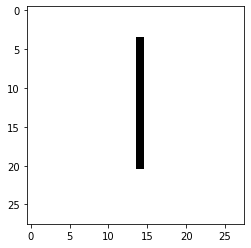

1/1 [==============================] - 0s 19ms/step
This digit is probably a 2


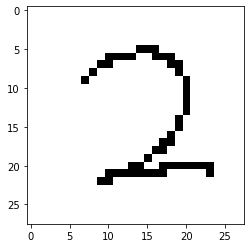

1/1 [==============================] - 0s 20ms/step
This digit is probably a 3


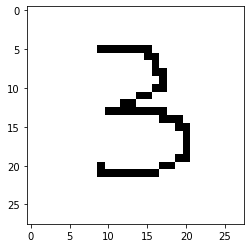

1/1 [==============================] - 0s 21ms/step
This digit is probably a 4


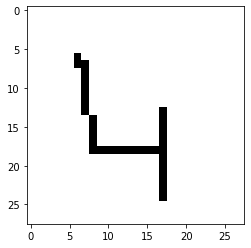

1/1 [==============================] - 0s 21ms/step
This digit is probably a 5


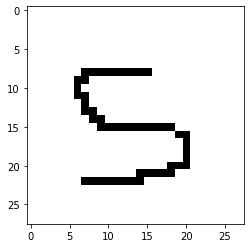

1/1 [==============================] - 0s 20ms/step
This digit is probably a 8


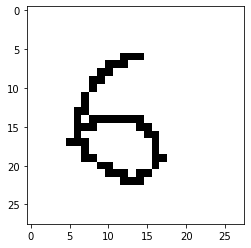

1/1 [==============================] - 0s 20ms/step
This digit is probably a 7


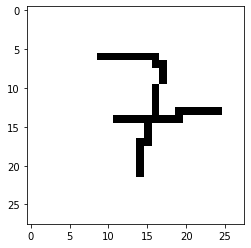

1/1 [==============================] - 0s 22ms/step
This digit is probably a 8


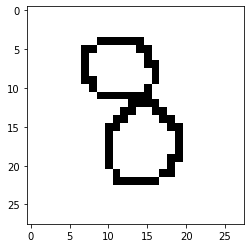

In [ ]:
#in this cell we are going to have some handwritten digits and we will feed them into the model to predict the digits
#try to read the digits file
image_number = 1
#while there is a file in the following path we will try to get this file into script
while os.path.isfile(f"digits/digit{image_number}.png"):
  try:
    img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0] # [:,:,0] -> we're not iterested in colors so we are only going to get the first channel and 0 at the end
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    #np.argmax -> give the index of the field that has the highest number
    print(f"This digit is probably a {np.argmax(prediction)}")
    #show the image
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number +=1
